In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_fuml_salary_19-20')

In [3]:
qbs.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
qbs.head()

,NAME,FUML,FUML_rank,salary
0,Teddy Bridgewater,0,7.5,7250000
1,Robert Griffin III,0,7.5,2000000
2,Josh Rosen,0,7.5,4399439
3,Drew Brees,0,7.5,25000000
4,Mason Rudolph,0,7.5,980472


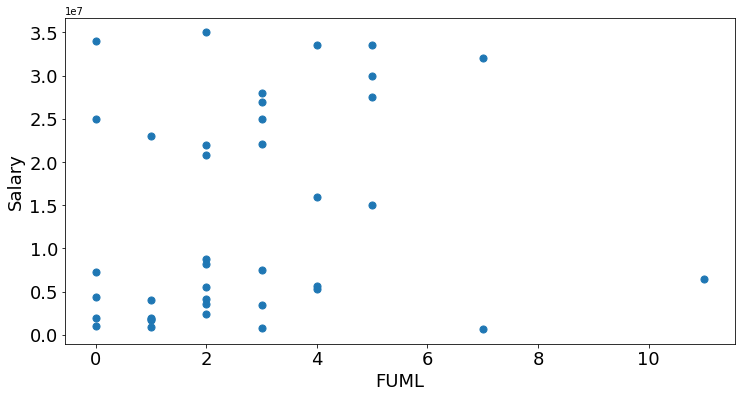

In [5]:
ax = qbs.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([-3.41607085e-17, -1.99270799e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.6999267 , -0.82985898],
       [-0.36128902,  1.0387944 ],
       [ 2.77479031, -0.85535567],
       [ 0.44008336, -0.50871113],
       [ 1.09632531,  1.466326  ]])

In [11]:
km.predict(X)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       3, 3, 1, 3, 1, 1, 3, 4, 3, 3, 4, 4, 3, 4, 4, 2, 2], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Teddy Bridgewater,0,7.5,7250000,0
1,Robert Griffin III,0,7.5,2000000,0
2,Josh Rosen,0,7.5,4399439,0
3,Drew Brees,0,7.5,25000000,1
4,Mason Rudolph,0,7.5,980472,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.13333333e+00, 3.85165213e+06],
       [1.90000000e+00, 2.61893333e+07],
       [9.00000000e+00, 3.54686750e+06],
       [3.71428571e+00, 7.69061900e+06],
       [5.20000000e+00, 3.13000000e+07]])

In [14]:
qbs.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,1.133333,3.851652e+06
1,1.900000,2.618933e+07
2,9.000000,3.546868e+06
3,3.714286,7.690619e+06
4,5.200000,3.130000e+07


In [15]:
centroids = qbs.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

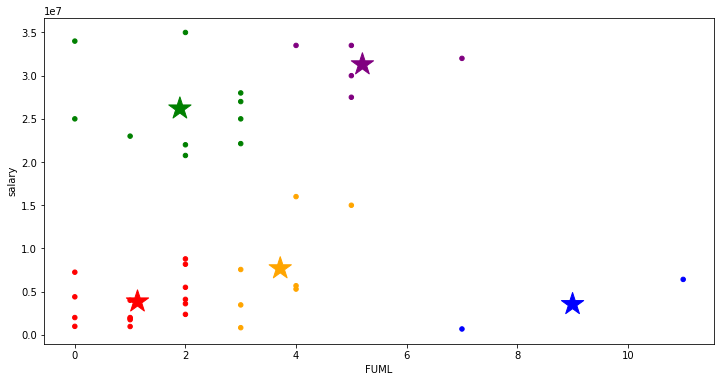

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

11.435697122776533

In [18]:
silhouette_score(X, km.labels_)

0.45829546907121393